In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("/Users/jack/rotations/moorjani/neanderthal/notebooks/")

da337 = pd.read_csv("../processed-data/admixfrog_test1_240925/DA337/240925_Chr21_DA337_test.bin.xz")
la727 = pd.read_csv("../processed-data/admixfrog_test1_240925/La727/240925_Chr21_La727.bin.xz")

In [48]:
def admix(df):
    return df["viterbi"].value_counts(normalize=True) * 100
print(admix(da337))
print(admix(la727))

viterbi
AFR       98.465063
NEA        0.817106
AFRDEN     0.313097
AFRNEA     0.221459
DEN        0.183276
Name: proportion, dtype: float64
viterbi
AFR       98.205422
AFRNEA     1.023291
AFRDEN     0.496373
NEA        0.267278
NEADEN     0.007637
Name: proportion, dtype: float64


/var/folders/1w/3zhjqj3d3ljgvrrqp77lpv6m0000gn/T/ipykernel_15828/1414901842.py:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(colormap.values(), colormap.keys())


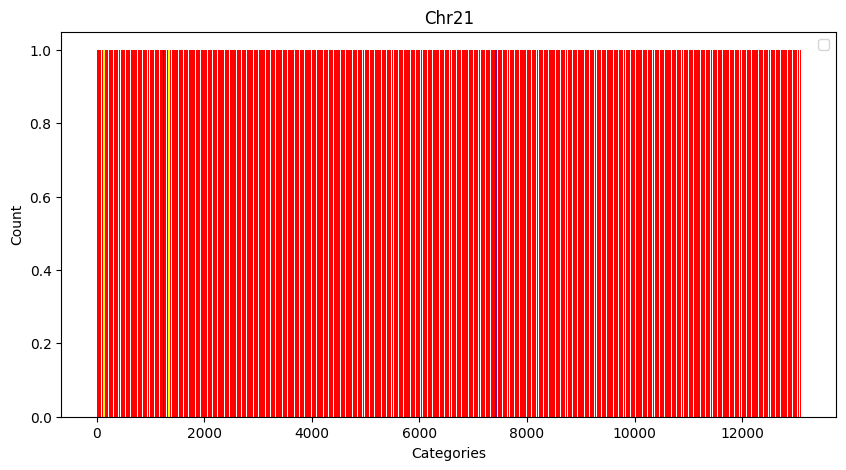

/var/folders/1w/3zhjqj3d3ljgvrrqp77lpv6m0000gn/T/ipykernel_15828/1414901842.py:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(colormap.values(), colormap.keys())


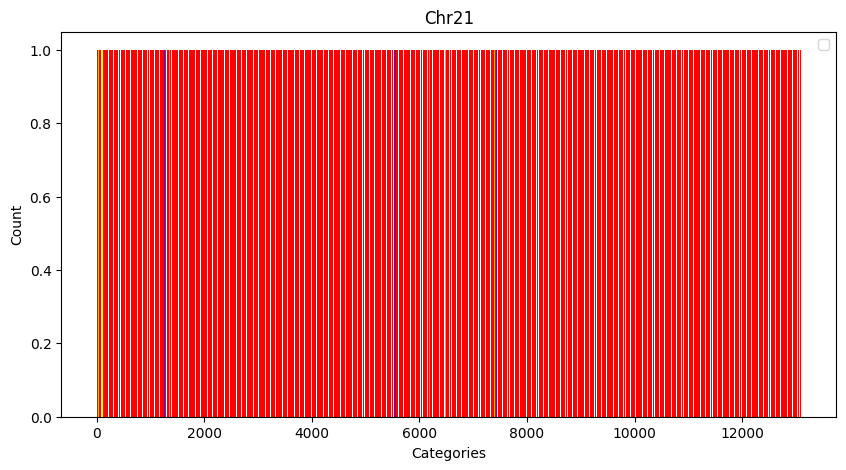

In [53]:
# df['viterbi'].unique()
colormap = {
    'AFR' : "r", 
    'NEA' : "yellow", 
    'DEN' : "b", 
    'AFRNEA' : "orange", 
    'AFRDEN' : "purple", 
    'NEADEN' : "green",
}

def bad_paint(df):
    colors = df['viterbi'].map(colormap)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(df)), [1]*len(df), color=colors)  # Height of each bar is 1
    # plt.xticks(range(len(df)), df['viterbi'])  # Set x-ticks to the values
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('Chr21')
    plt.legend(colormap.values(), colormap.keys())
    # plt.legend(colormap)
    plt.show()

bad_paint(da337)
bad_paint(la727)

In [70]:
haplos = tuple(da337['viterbi'].tolist())
labels, runs = [haplos[0]], [1]
# runs[-1] += 1
# runs
ctr = 0
for i in range(1, len(haplos)):
    if haplos[i] == haplos[i-1]:
        runs[ctr] += 1
    else:
        labels.append(haplos[i])
        ctr += 1
        runs.append(1)

for a, b in zip(labels, runs):
    print(f"{a} : {b}")
# df['viterbi'].tolist()



AFR : 114
NEA : 47
AFR : 719
DEN : 3
AFR : 352
DEN : 21
AFR : 79
NEA : 23
AFR : 1839
AFRNEA : 1
AFR : 4200
NEA : 5
AFRDEN : 41
AFRNEA : 14
AFR : 331
NEA : 7
AFR : 1147
NEA : 6
AFR : 941
AFRNEA : 5
AFR : 425
AFRNEA : 9
AFR : 223
NEA : 19
AFR : 2524


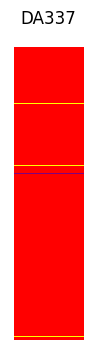

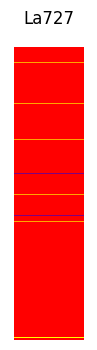

In [78]:
def paint(df, title=None):
    haplos = tuple(df['viterbi'].tolist())
    labels, runs = [haplos[0]], [1]
    # runs[-1] += 1
    # runs
    ctr = 0
    for i in range(1, len(haplos)):
        if haplos[i] == haplos[i-1]:
            runs[ctr] += 1
        else:
            labels.append(haplos[i])
            ctr += 1
            runs.append(1)

    # for a, b in zip(labels, runs):
    #     print(f"{a} : {b}")

    x = [1]

    fig, ax = plt.subplots(figsize=(1, 4))
    fl = 0

    for i in range(len(runs)):
        # print(i, runs[i], labels[i], colormap[labels[i]])
        ax.bar(x, runs[i], bottom=fl, color=colormap[labels[i]])
        fl += runs[i]
    ax.axis("off")
    ax.set_title(title if title else "")
    plt.show()

paint(da337, title="DA337")
paint(la727, title="La727")

In [1]:
import os
os.getcwd()

'/Users/jack/rotations/moorjani'